In [1]:
import sys
sys.path.append('../')
# print (sys.path)

import numpy as np

# from gcastle.castle.algorithms import *
from ncpop import *
from anm import *
from gcastle.castle.common import GraphDAG, consts
from gcastle.castle.metrics import MetricsDAG
from gcastle.castle.datasets import IIDSimulation, DAG
from data_generation import *

## generate dataset or load data

In [2]:
########################################
######  method 1 - load data  ##########
########################################

# data = np.load('../gcastle/tests/dataset/linear_gauss_6nodes_15edges.npz', allow_pickle=True)
# x = data['x']
# true_dag = data['y']
# X = x[:30]

# rank = np.linalg.matrix_rank(true_dag)
# error_params = []

########################################
######  method 2 - generate lds  #######
########################################

# data = data_generation(g,f_dash,proc_noise_std,obs_noise_std,T)

########################################
######  method 3 - generate data  ######
########################################

data = weighted_random_dag = DAG.erdos_renyi(n_nodes=4, n_edges=9,
                                          weight_range=(0.5, 2.0), seed=1)
dataset = IIDSimulation(W=weighted_random_dag, n=20, method='nonlinear',sem_type='gp-add')
true_dag, X = dataset.B, dataset.X

2023-05-06 17:02:24,542 - /Users/momo/Desktop/CoDiet/code/gCastle-ongoing/ncpop method/../gcastle/castle/datasets/simulator.py[line:270] - INFO: Finished synthetic dataset


In [3]:
true_dag

array([[0, 0, 0, 0],
       [1, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 1, 1, 0]])

## model learning and testing

The problem has 43 noncommuting Hermitian variables
Calculating block structure...
Estimated number of SDP variables: 989
Generating moment matrix...
Reduced number of SDP variables: 989989 (done: 100.10%, ETA 00:00:-0.0)
Processing 40/40 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 989             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 0               
  Scalar variables       : 0               
  Matrix variables       : 1               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator started.
Freed constraints in eliminator : 0
Eliminator terminated.
Eliminator - tries                  : 1                 time                   : 0.00     

1   1.2e+00  2.6e-01  3.6e-01  1.32e-02   7.229315834e+00   6.931637853e+00   2.6e-01  0.05  
2   1.7e-01  3.8e-02  1.3e-02  4.62e-01   1.649658996e+01   1.640422615e+01   3.8e-02  0.08  
3   1.0e-03  2.2e-04  2.9e-06  9.12e-01   1.820459874e+01   1.820389978e+01   2.2e-04  0.09  
4   2.7e-06  6.1e-07  4.7e-10  1.00e+00   1.821743484e+01   1.821743295e+01   6.1e-07  0.11  
5   3.1e-08  7.0e-09  5.7e-13  1.00e+00   1.821747271e+01   1.821747269e+01   7.0e-09  0.13  
Optimizer terminated. Time: 0.14    

5.814964860780464 5.8149648824023 optimal
ok.
The problem has 43 noncommuting Hermitian variables
Calculating block structure...
Estimated number of SDP variables: 989
Generating moment matrix...
Reduced number of SDP variables: 989989 (done: 100.10%, ETA 00:00:-0.0)
Processing 40/40 constraints...
Problem
  Name                   :                 
  Objective sense        : minimize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 989    

2   3.4e-01  4.3e-02  4.8e-02  1.42e-01   3.938700304e+01   3.943556215e+01   4.3e-02  0.08  
3   2.6e-01  3.2e-02  3.4e-02  2.57e-01   4.200864542e+01   4.207244743e+01   3.2e-02  0.09  
4   3.0e-02  3.8e-03  1.5e-03  1.05e+00   5.153628496e+01   5.154886463e+01   3.8e-03  0.11  
5   6.2e-05  7.8e-06  1.4e-07  9.86e-01   5.270711915e+01   5.270714565e+01   7.8e-06  0.13  
6   3.2e-07  4.0e-08  5.0e-11  1.00e+00   5.270976581e+01   5.270976594e+01   4.0e-08  0.15  
7   1.6e-10  9.6e-10  5.7e-16  1.00e+00   5.270978003e+01   5.270978003e+01   2.0e-11  0.16  
Optimizer terminated. Time: 0.17    

9.28605180809263 9.286051808025391 optimal
ok.


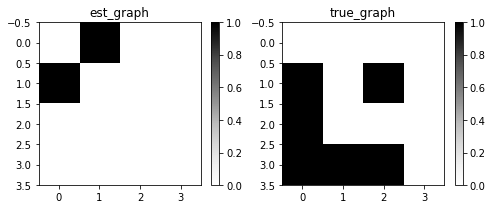

Done <function ncpop_polyn at 0x7f9a89241b80> 


In [11]:
ncp = NCPLinear(alpha=0.05)
ncp_causal_matrices = []
Y_pred = []
Noise =[]
MM = []
# for method in [ncpop_linear, ncpop_hidden, ncpop_polyn]:
for method in [ncpop_polyn]:
    ncp.learn(data=X,m_ncpop=method)
    ncp_causal_matrices.append(ncp.causal_matrix)
    Y_pred.append(np.array(ncp.pred))
    Noise.append(np.array(ncp.est_noise))

    GraphDAG(ncp.causal_matrix, true_dag)
    mm = MetricsDAG(ncp.causal_matrix, true_dag)
    MM.append(mm)
    print("Done", str(method),"\n","="*80)

In [12]:
ncp.pred[0],ncp.real[0]

([1.4441493397969773,
  0.2992289206003036,
  0.16875602883238514,
  0.7065684295380041,
  0.8319642527984209,
  -0.17202075232826913,
  0.5825275297596438,
  -1.9855355804237331,
  -0.5555925938261842,
  0.9169517425892154,
  1.4994522751675627,
  0.5869738748257497,
  0.09457138538344083,
  -0.31702968346425037,
  -0.6907769551110986,
  0.7978818697882402,
  -0.49278672063504847,
  1.0940767353890135,
  0.42107380480001383,
  0.22759524025112354],
 Tensor([[ 1.3390571 ],
         [ 0.40154282],
         [ 0.26129561],
         [ 0.97213406],
         [ 0.93871977],
         [-0.29377237],
         [ 0.86677664],
         [-2.14519908],
         [-0.9127091 ],
         [ 1.3412777 ],
         [ 2.25834324],
         [ 0.88348527],
         [ 0.12663409],
         [-0.55135687],
         [-1.12728407],
         [ 1.16517783],
         [-0.84975204],
         [ 1.54319046],
         [ 0.41690619],
         [ 0.07509668]]))

/Users/momo/Desktop/CoDiet/code/gCastle-ongoing/ncpop method/../gcastle/castle/metrics/evaluation.py:226: RuntimeWarning: invalid value encountered in scalar divide
  F1 = 2*(recall*precision)/(recall+precision)


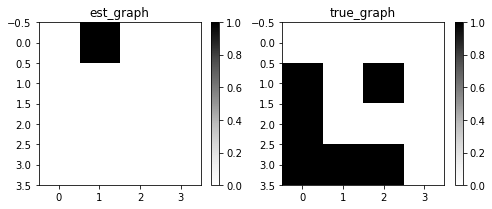

In [4]:
from sklearn.gaussian_process.kernels import Matern, RBF

anm = ANMNonlinear(alpha=0.05)
anm.learn(data=X)

# kernel = Matern(nu=1.5)
# kernel = 1.0 * RBF(1.0)
# anm.learn(data=X, regressor=GPR(kernel=kernel))

GraphDAG(anm.causal_matrix, true_dag, show=False, save_name='result')
mm = MetricsDAG(anm.causal_matrix, true_dag)

In [9]:
MM[0].metrics#, MM[1].metrics

{'fdr': 0.1429,
 'tpr': 0.6,
 'fpr': 0.2,
 'shd': 4,
 'nnz': 7,
 'precision': 0.5455,
 'recall': 0.6,
 'F1': 0.5714,
 'gscore': 0.1}

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 1.]
 [0. 0. 1. 0. 1. 0.]
 [1. 0. 1. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0.]]


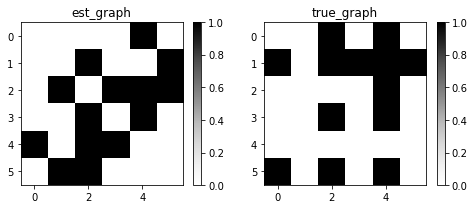

In [7]:
print(ncp.causal_matrix)
GraphDAG(ncp.causal_matrix, true_dag)
mm = MetricsDAG(ncp.causal_matrix, true_dag)
print(mm.metrics)

## Test Methods

In [7]:
def y(x, noise_sigma=0.0):
    x = np.asarray(x)
    y = x*np.sin(x)+np.random.normal(0,noise_sigma, size=x.shape)
    return y
train_x = np.array([1,3,5,7,9]).reshape(-1,1)
train_y = y(train_x, noise_sigma=1e-4)
test_x = np.arange(0,10,0.1).reshape(-1,1)

In [ ]:
sca_l = 1
ga = 1/(2*sca_l**2)

In [ ]:
from sklearn.

In [ ]:
K = rbf_kernel(train_x, gamma=ga)
u = np.array([0 for i in train_y]).reshape(-1,1)

In [10]:
u = np.array([0 for i in train_y]).reshape(-1,1)

In [13]:
a = np.array([[1,1],[1,0]])
np.sqrt(np.diag(a))

array([1., 0.])

In [21]:
from ncpol2sdpa import*
import numpy as np

a = generate_variables('y', 2, commutative=True)
L = generate_variables("L", n_vars=1,commutative=True)[0]

In [6]:
c= np.array(a).reshape(-1,1)*np.array(a).reshape(-1,1).T

In [7]:
b = np.array(a).reshape(-1,1) - np.array(a).reshape(-1,1).T

In [8]:
d = [c[i,j]-b[i,j] for i in range(len(c)) for j in range(len(c))]

In [20]:
L

[L]

In [10]:
c,b

(array([[y0**2, y0*y1],
        [y0*y1, y1**2]], dtype=object),
 array([[0, y0 - y1],
        [-y0 + y1, 0]], dtype=object))

In [11]:
from scipy.spatial.distance import pdist, squareform

In [12]:
X = np.array([0,1,2,3,4]).reshape(-1,1)
y = pdist(X, 'sqeuclidean')

In [13]:
y

array([ 1.,  4.,  9., 16.,  1.,  4.,  9.,  1.,  4.,  1.])

In [14]:
D = squareform(pdist(X, 'sqeuclidean'))

In [23]:
K2 = np.exp(-0.5*D/L**2)

TypeError: loop of ufunc does not support argument 0 of type Zero which has no callable exp method